In [32]:
!pip install wordcloud

In [33]:
import requests
from bs4 import BeautifulSoup
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
import pandas as pd #data science library
import seaborn as sns #plotting library
sns.set() #sets style of seaborn plots
import plotly.express as px #plotting library for fancy interactive plots

#!pip install jupyterlab "ipywidgets>=7.5"
import matplotlib.pyplot as plt #yet another plotting library, python's main one
from nltk.corpus import wordnet as wn #A corpus of language from WordNet, a large linguistic resource
from nltk.stem.wordnet import WordNetLemmatizer #A Lemmatizer reduces a word to its root form; this imports it.
lemmatizer = WordNetLemmatizer() #This 'creates' the lemmatizer
from nltk.tokenize import word_tokenize #A Tokenizer breaks text into chunks, usually words
from sklearn.preprocessing import MinMaxScaler #This allows us to rescale a column of values to between 0 and 1.

In [35]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [38]:
with open("ing-NLP-manifesto/manifesto.txt", 'r') as f:
    text = f.read()

FileNotFoundError: [Errno 2] No such file or directory: 'ing-NLP-manifesto/manifesto.txt'

In [8]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm") 

In [9]:
manifesto = nlp(text)

In [10]:
# Extract verbs and their frequencies
verbs = [token.lemma_ for token in manifesto if token.pos_ == "VERB"]
verb_freq = Counter(verbs)

In [11]:
print("Most Frequent Verbs:")
print(verb_freq.most_common(10))

Most Frequent Verbs:
[('have', 9), ('imagine', 5), ('assume', 3), ('play', 3), ('exist', 3), ('give', 3), ('take', 3), ('ponder', 3), ('wake', 2), ('accept', 2)]


In [12]:
font_path = "AkzidenzGrotesk-Medium.otf"

In [13]:
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(verb_freq)

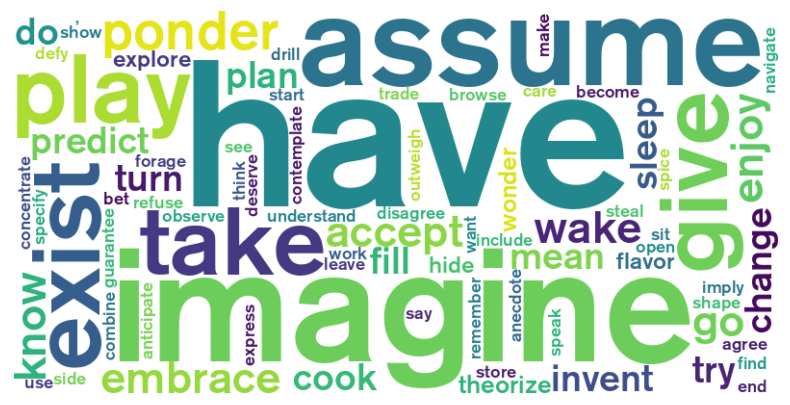

In [14]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
vad = pd.read_excel('vad.xlsx', index_col = 0)  #VAD norms
sm = pd.read_excel('sensorimotor.xlsx', index_col = 0) #Sensorimotor norms
sm = sm[['auditory', 'gustatory', 'haptic', 'interoceptive', 'olfactory',
       'visual', 'foot_leg', 'hand_arm', 'head', 'mouth', 'torso']]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sm)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=sm.columns)
scaled_df.index = sm.index

all_norms = vad.merge(scaled_df, left_index=True, right_index=True) #This creates a dataframe with all 
                                                                    #our word norm data scaled between 0 and 1

In [16]:
def word_norms(text):
    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(i.lower()) for i in tokens]
    
    words = []
    norms = []
    
    for i in lemmas:
        if i in all_norms.index:
            norms.append(all_norms.loc[i])
            words.append(i)
        else:
            pass
    norms_df = pd.DataFrame(norms, index = words)
    return norms_df

def word_norms_mean(text):
    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(i.lower()) for i in tokens]
    
    words = []
    norms = []
    
    for i in lemmas:
        if i in all_norms.index:
            norms.append(all_norms.loc[i])
            words.append(i)
        else:
            pass
    norms_df = pd.DataFrame(norms)
    return norms_df.mean()


In [17]:
split = text.split('\n')
split_text = [i for i in split if i!= ' ']

In [18]:
split_manifesto = []
for i in split_text:
    i = i.replace('\ufeff', '')
    i = i.replace('\n', ' ')
    i = i.strip()
    split_manifesto.append(i)

In [19]:
word_norms_mean(split_manifesto[0])

valence          0.488902
arousal          0.442860
dominance        0.412621
auditory         0.210526
gustatory        0.021053
haptic           0.206387
interoceptive    0.139635
olfactory        0.021053
visual           0.620175
foot_leg         0.093836
hand_arm         0.205564
head             0.705848
mouth            0.191228
torso            0.088776
dtype: float64

In [20]:
len(split_manifesto)

99

In [21]:
norms = []
 
for i in range(len(split_manifesto)):
     norm = word_norms_mean(split_manifesto[i])
     norms.append(norm)
 
norms_df = pd.DataFrame(norms)

In [22]:
norms_df['text'] = split_manifesto

In [23]:
norms_df

valence   arousal  dominance  auditory  gustatory    haptic  \
0   0.488902  0.442860   0.412621  0.210526   0.021053  0.206387   
1   0.445093  0.504288   0.475728  0.421053   0.042105  0.053223   
2   0.445093  0.504288   0.475728  0.421053   0.042105  0.053223   
3   0.445093  0.504288   0.475728  0.421053   0.042105  0.053223   
4   0.445093  0.504288   0.475728  0.421053   0.042105  0.053223   
..       ...       ...        ...       ...        ...       ...   
94  0.636488  0.511042   0.651193  0.349712   0.073326  0.102307   
95  0.590732  0.536378   0.595967  0.442931   0.192982  0.209344   
96  0.636994  0.497684   0.671537  0.428719   0.151789  0.193696   
97  0.557535  0.491424   0.598756  0.337436   0.109105  0.304763   
98       NaN       NaN        NaN       NaN        NaN       NaN   

    interoceptive  olfactory    visual  foot_leg  hand_arm      head  \
0        0.139635   0.021053  0.620175  0.093836  0.205564  0.705848   
1        0.279270   0.042105  0.273684  0.053114  0.074428  0.589474   
2        0.279270   0.042105  0.273684  0.053114  0.074428  0.589474   
3        0.279270   0.042105  0.273684  0.053114  0.074428  0.589474   
4        0.279270   0.042105  0.273684  0.053114  0.074428  0.589474   
..            ...        ...       ...       ...       ...       ...   
94       0.268197   0.068261  0.477671  0.108525  0.146283  0.563823   
95       0.370043   0.182456  0.539112  0.098439  0.193160  0.599825   
96       0.369074   0.141974  0.537693  0.231744  0.285368  0.502117   
97       0.200953   0.116768  0.584924  0.115317  0.346890  0.448480   
98            NaN        NaN       NaN       NaN       NaN       NaN   

       mouth     torso                                               text  
0   0.191228  0.088776                            Speculation is a mirror  
1   0.315789  0.057070                        Speculation is Especulación  
2   0.315789  0.057070                         Speculation is Spéculation  
3   0.315789  0.057070                         Speculation is Spekulation  
4   0.315789  0.057070                        Speculation is Speculazione  
..       ...       ...                                                ...  
94  0.361917  0.132599  Speculation is the state or fact of being of g...  
95  0.258596  0.123843  Speculation is the quality of being worthy of ...  
96  0.327380  0.201535  Speculation is having or showing the qualities...  
97  0.224781  0.126617  Speculation is an amount or section which, whe...  
98       NaN       NaN                                                     

[99 rows x 15 columns]

In [24]:
top_5_valence_texts = norms_df.nlargest(5, 'valence')['text'].tolist()
top_5_arousal_texts = norms_df.nlargest(5, 'arousal')['text'].tolist()
top_5_dominance_texts = norms_df.nlargest(5, 'dominance')['text'].tolist()

print("Top 5 Valence Texts:")
for text in top_5_valence_texts:
    print(text)

print("\nTop 5 Arousal Texts:")
for text in top_5_arousal_texts:
    print(text)

print("\nTop 5 Dominance Texts:")
for text in top_5_dominance_texts:
    print(text)

Top 5 Valence Texts:
Speculation is cooking new meals.
Speculation is spontaneous and fun.
Speculation is giving special importance or value to (something) in speaking or writing.
Speculation is a warm seat and a shiver.
Speculation is pondering the broadness of ideas like guesswork, talk, guesstimate, gambling, opinion, supposition, and theorizing—all synonyms that open windows to different points of view.

Top 5 Arousal Texts:
Speculation is spontaneous and fun.
Speculation is Risk.
Speculation is the belly of a snake.
Speculation is an outcome at risk.
Speculation is like browsing Instagram for quick knowledge bites when you're too tired to concentrate on anything else.

Top 5 Dominance Texts:
Speculation is A choice.
Speculation is having or showing the qualities that deserve the specified action or regard.
Speculation implies the action of speculating and that act means you are actively defying unpredictability
Speculation is giving special importance or value to (something) in sp

In [25]:
import plotly.graph_objects as go

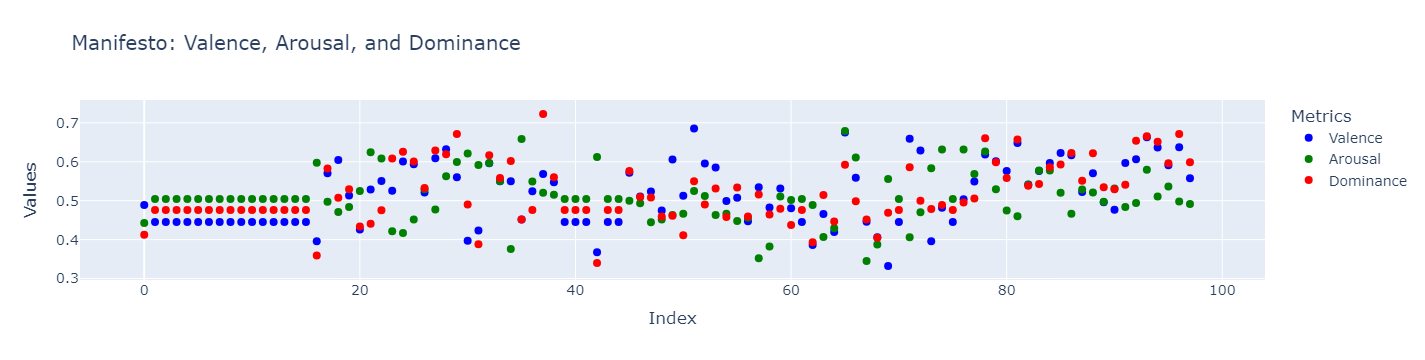

In [26]:
fig = go.Figure()

# Add scatter plots for each column
fig.add_trace(go.Scatter(x=norms_df.index, y=norms_df['valence'], mode='markers', name='Valence', 
                         marker=dict(color='blue', size=8, symbol='circle')))
fig.add_trace(go.Scatter(x=norms_df.index, y=norms_df['arousal'], mode='markers', name='Arousal', 
                         marker=dict(color='green', size=8, symbol='circle')))
fig.add_trace(go.Scatter(x=norms_df.index, y=norms_df['dominance'], mode='markers', name='Dominance', 
                         marker=dict(color='red', size=8, symbol='circle')))

# Update layout with titles and legend
fig.update_layout(
    title='Manifesto: Valence, Arousal, and Dominance',
    xaxis_title='Index',
    yaxis_title='Values',
    legend_title='Metrics',
    template='plotly',  # Use a dark theme for better aesthetics
    font=dict(size=14)       # Increase font size for better readability
)

# Show the figure
fig.show()

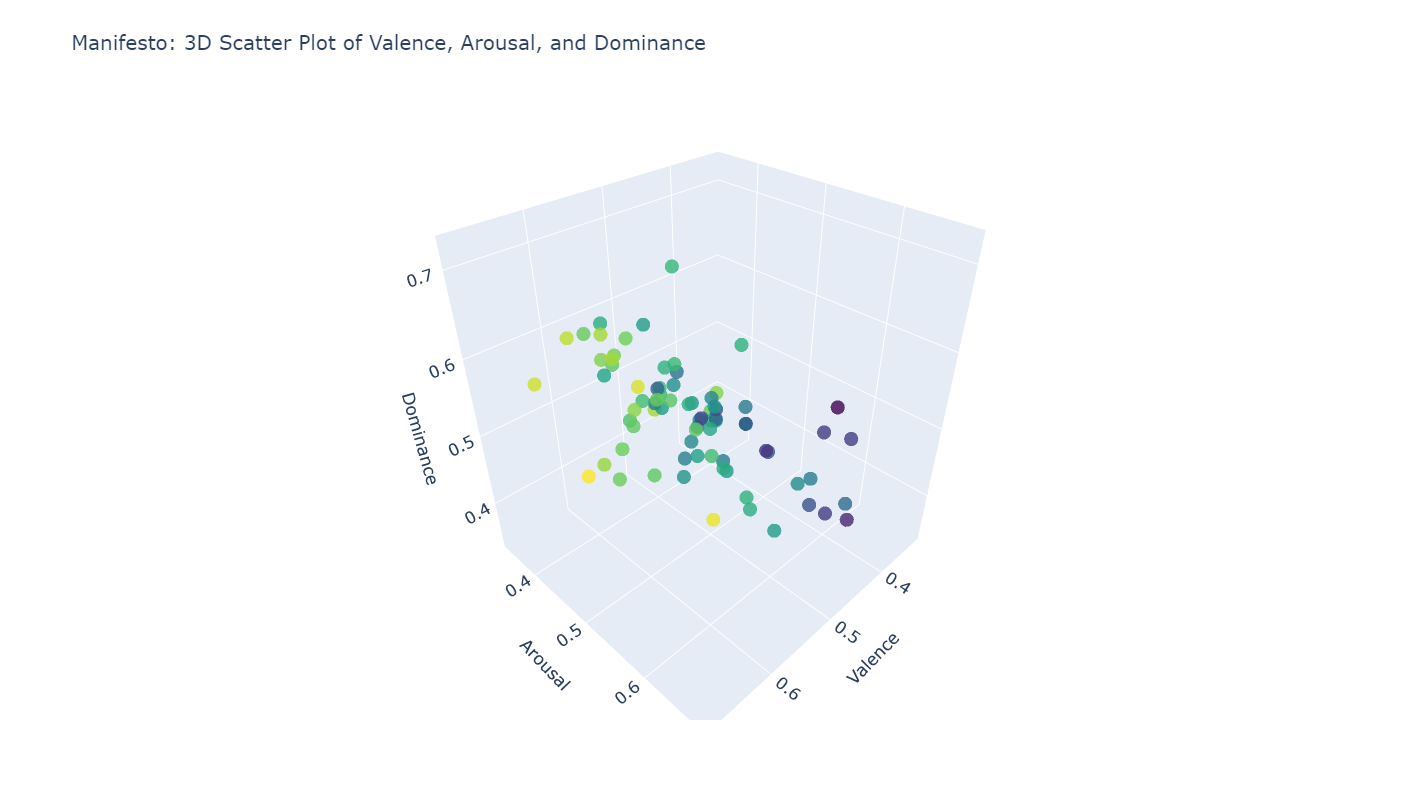

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=norms_df['valence'],
    y=norms_df['arousal'],
    z=norms_df['dominance'],
    mode='markers',
    marker=dict(
        size=8,
        color=norms_df['valence'],  # Color by valence for gradient effect
        colorscale='Viridis',
        opacity=0.8,
    ),
    text=norms_df.index,  # Use index for hover text
    hovertemplate='<b>Index</b>: %{text}<br>' +
                  '<b>Valence</b>: %{x}<br>' +
                  '<b>Arousal</b>: %{y}<br>' +
                  '<b>Dominance</b>: %{z}<br>',
    showlegend=False  # Remove legend
))

# Update layout with titles and axis labels
fig.update_layout(
    title='Manifesto: 3D Scatter Plot of Valence, Arousal, and Dominance',
    scene=dict(
        xaxis_title='Valence',
        yaxis_title='Arousal',
        zaxis_title='Dominance',
    ),
    template='plotly',  # Dark theme for aesthetics
    font=dict(size=14),  # Increase font size
    width=1000,  # Set width of the figure
    height=800,  # Set height of the figure
)

# Show the figure
fig.show()

In [28]:
norms_df.iloc[18]

valence                                                   0.604264
arousal                                                    0.47084
dominance                                                 0.507282
auditory                                                  0.331579
gustatory                                                 0.064967
haptic                                                    0.127901
interoceptive                                             0.242179
olfactory                                                 0.100822
visual                                                    0.630099
foot_leg                                                  0.173065
hand_arm                                                  0.198742
head                                                      0.539313
mouth                                                      0.27117
torso                                                     0.179328
text             Speculation is waking up the next day without

In [29]:
top_5_visual_texts = norms_df.nlargest(5, 'visual')[['text', 'visual']]
top_5_haptic_texts = norms_df.nlargest(5, 'haptic')[['text', 'haptic']]
top_5_auditory_texts = norms_df.nlargest(5, 'auditory')[['text', 'auditory']]
top_5_gustatory_texts = norms_df.nlargest(5, 'gustatory')[['text', 'gustatory']]
top_5_interoceptive_texts = norms_df.nlargest(5, 'interoceptive')[['text', 'interoceptive']]


print("Top 5 Visual Texts:")
for index, row in top_5_visual_texts.iterrows():
    print(f"Text: {row['text']}, Visual: {row['visual']}")

print("\nTop 5 Haptic Texts:")
for index, row in top_5_haptic_texts.iterrows():
    print(f"Text: {row['text']}, Haptic: {row['haptic']}")

print("\nTop 5 Auditory Texts:")
for index, row in top_5_auditory_texts.iterrows():
    print(f"Text: {row['text']}, Auditory: {row['auditory']}")

print("\nTop 5 Gustatory Texts:")
for index, row in top_5_gustatory_texts.iterrows():
    print(f"Text: {row['text']}, Gustatory: {row['gustatory']}")

print("\nTop 5 Interoceptive Texts:")
for index, row in top_5_interoceptive_texts.iterrows():
    print(f"Text: {row['text']}, Interoceptive: {row['interoceptive']}")

Top 5 Visual Texts:
Text: Speculation is the belly of a snake., Visual: 0.6582456140666667
Text: Speculation is like navigating the dentist's chair, imagining all the wild things you could store in that newly drilled tooth-hole, from tools to spice cabinets., Visual: 0.6502282822000001
Text: Speculation is turning off the TV., Visual: 0.6318421053000001
Text: Speculation is waking up the next day without caring about the outcome of your day, Visual: 0.63009868425
Text: Speculation is imagining a future where swamps become archives of human and animal history, complete with secret cults and psychoactive initiations, next to ancient Greek artifacts and industrial ruins., Visual: 0.6263439046461539

Top 5 Haptic Texts:
Text: Speculation is a warm seat and a shiver., Haptic: 0.5497020807460405
Text: Speculation is having a cold shower., Haptic: 0.5481118527458976
Text: Speculation is not having a cold a shower., Haptic: 0.4370130166235517
Text: Speculation is a dog without a leash., Haptic

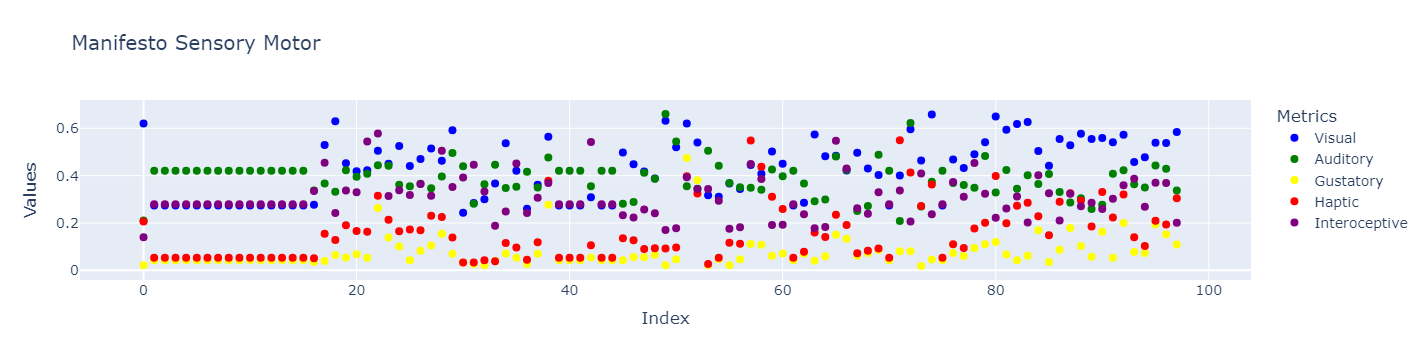

In [30]:
fig = go.Figure()

# Add scatter plots for each column
fig.add_trace(go.Scatter(x=norms_df.index, y=norms_df['visual'], mode='markers', name='Visual', 
                         marker=dict(color='blue', size=8, symbol='circle')))
fig.add_trace(go.Scatter(x=norms_df.index, y=norms_df['auditory'], mode='markers', name='Auditory', 
                         marker=dict(color='green', size=8, symbol='circle')))
fig.add_trace(go.Scatter(x=norms_df.index, y=norms_df['gustatory'], mode='markers', name='Gustatory', 
                         marker=dict(color='yellow', size=8, symbol='circle')))
fig.add_trace(go.Scatter(x=norms_df.index, y=norms_df['haptic'], mode='markers', name='Haptic', 
                         marker=dict(color='red', size=8, symbol='circle')))
fig.add_trace(go.Scatter(x=norms_df.index, y=norms_df['interoceptive'], mode='markers', name='Interoceptive', 
                         marker=dict(color='purple', size=8, symbol='circle')))

# Update layout with titles and legend
fig.update_layout(
    title='Manifesto Sensory Motor',
    xaxis_title='Index',
    yaxis_title='Values',
    legend_title='Metrics',
    template='plotly',  # Use a dark theme for better aesthetics
    font=dict(size=14)       # Increase font size for better readability
)

# Show the figure
fig.show()

In [31]:
norms_df.iloc[51]

valence                                   0.685164
arousal                                   0.524871
dominance                                 0.550162
auditory                                  0.355351
gustatory                                 0.474868
haptic                                    0.397797
interoceptive                              0.39326
olfactory                                 0.480702
visual                                    0.620395
foot_leg                                  0.114618
hand_arm                                  0.321266
head                                      0.526491
mouth                                     0.494152
torso                                     0.225048
text             Speculation is cooking new meals.
Name: 51, dtype: object

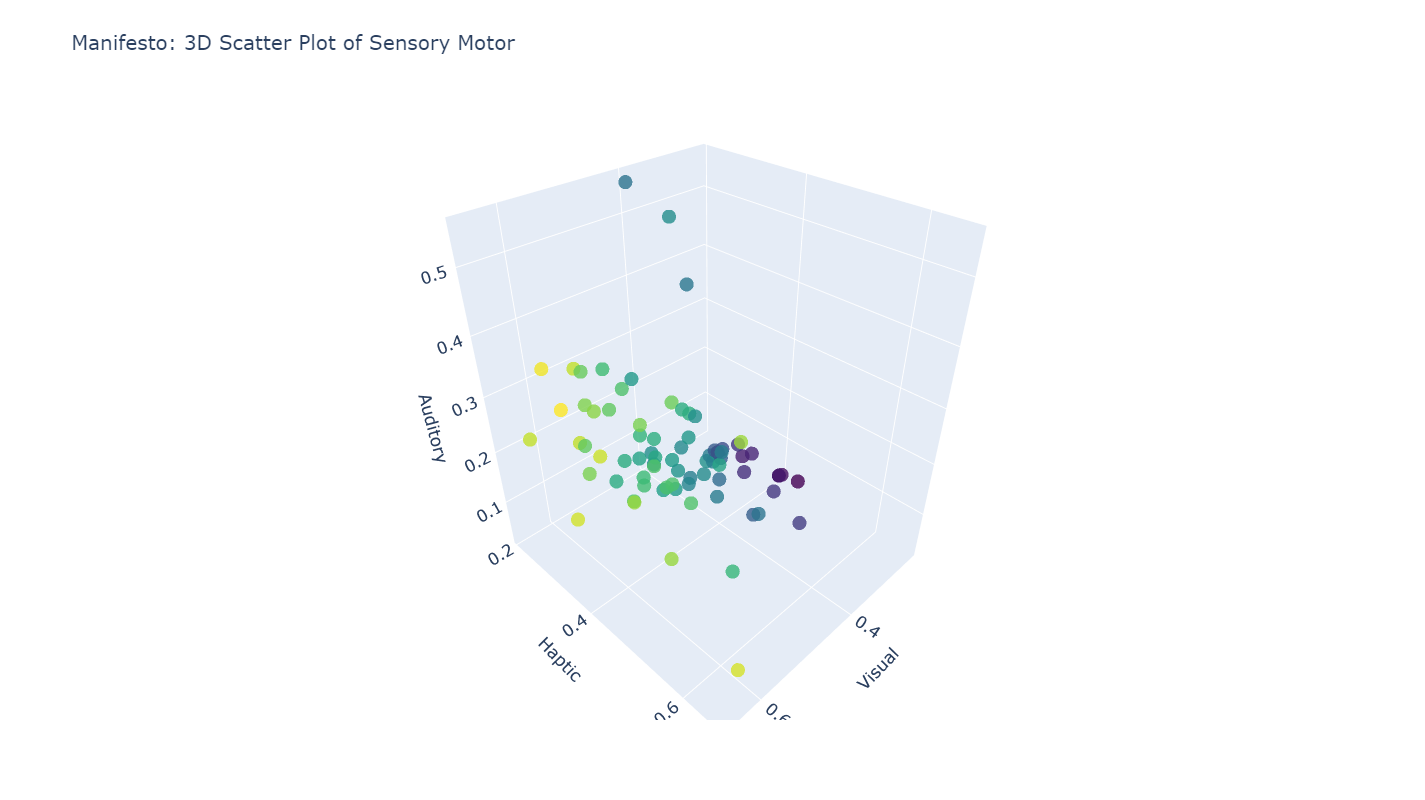

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=norms_df['visual'],
    y=norms_df['auditory'],
    z=norms_df['haptic'],
    mode='markers',
    marker=dict(
        size=8,
        color=norms_df['visual'],  # Color by valence for gradient effect
        colorscale='Viridis',
        opacity=0.8,
    ),
    text=norms_df.index,  # Use index for hover text
    hovertemplate='<b>Index</b>: %{text}<br>' +
                  '<b>Visual</b>: %{x}<br>' +
                  '<b>Auditory</b>: %{y}<br>' +
                  '<b>Haptic</b>: %{z}<br>',
    showlegend=False  # Remove legend
))

# Update layout with titles and axis labels
fig.update_layout(
    title='Manifesto: 3D Scatter Plot of Sensory Motor',
    scene=dict(
        xaxis_title='Visual',
        yaxis_title='Haptic',
        zaxis_title='Auditory',
    ),
    template='plotly',  # Dark theme for aesthetics
    font=dict(size=14),  # Increase font size
    width=1000,  # Set width of the figure
    height=800,  # Set height of the figure
)

# Show the figure
fig.show()

In [33]:
#comparison text, news headlines

In [34]:
news_dataframe = pd.read_csv('guardian_headlines.csv')

In [35]:
news_df_cleaned = news_dataframe.drop(columns=['Time'])

In [36]:
news_df_cleaned

Headlines
0       Johnson is asking Santa for a Christmas recovery
1      ‘I now fear the worst’: four grim tales of wor...
2      Five key areas Sunak must tackle to serve up e...
3      Covid-19 leaves firms ‘fatally ill-prepared’ f...
4      The Week in Patriarchy  \n\n\n  Bacardi's 'lad...
...                                                  ...
17795  How investing in solar energy can create a bri...
17796     Poundland suppliers hit by insurance downgrade
17797  Cryptocurrencies: City watchdog to investigate...
17798  Unilever sells household name spreads to KKR f...
17799  The Guardian view on Ryanair’s model: a union-...

[17800 rows x 1 columns]

In [37]:
news_df = pd.DataFrame(news_df_cleaned)

In [38]:
# create random sample
news_df_clean = news_df.dropna() 
news_df_sample = news_df_clean.sample(n=99, random_state=1)
print(news_df_sample.head(5))

                                              Headlines
2790  Panic hits global markets amid threat of coron...
4385  Factcheck  Would 'getting Brexit done' bring l...
7210  Food waste: how to get cheap grub and help sav...
1826  UK petrol prices to stay steady despite global...
2939  China transferred detained Uighurs to factorie...


In [39]:
len(news_df_sample)

99

In [40]:
nlp = spacy.load("en_core_web_sm") 
data = news_df_sample
news_df_sample = pd.DataFrame(data)

def extract_verbs(text):
    doc = nlp(text)
    verbs_news = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    return verbs_news

# Apply the extract_verbs function to each headline in the DataFrame
news_df_sample['verbs'] = news_df_sample['Headlines'].apply(extract_verbs)

# Flatten the list of verbs and count occurrences
all_verbs = [verb for verbs_list in news_df_sample['verbs'] for verb in verbs_list]
verb_counts = Counter(all_verbs)

# Print the counts
print(verb_counts)

Counter({'say': 11, 'get': 4, 'use': 3, 'warn': 3, 'sell': 3, 'find': 3, 'live': 3, 'hit': 2, 'help': 2, 'tackle': 2, 'come': 2, 'urge': 2, 'cut': 2, 'build': 2, 'pay': 2, 'scrap': 2, 'mean': 2, 'put': 2, 'make': 2, 'start': 2, 'need': 2, 'lose': 2, 'take': 2, 'fall': 2, 'do': 1, 'bring': 1, 'save': 1, 'stay': 1, 'transfer': 1, 'detain': 1, 'pick': 1, 'join': 1, 'host': 1, 'let': 1, 'die': 1, 'think': 1, 'go': 1, 'close': 1, 'deny': 1, 'intervene': 1, 'emit': 1, 'dash': 1, 'act': 1, 'secure': 1, 'keep': 1, 'agree': 1, 'beat': 1, 'reach': 1, 'seek': 1, 'calm': 1, 'want': 1, 'contribute': 1, 'order': 1, 'expand': 1, 'finance': 1, 'revolutionise': 1, 'raise': 1, 'offset': 1, 'remove': 1, 'cover': 1, 'finish': 1, 'stop': 1, '’': 1, 'damage': 1, 'extend': 1, 'run': 1, 'hurt': 1, 'swallow': 1, 'develop': 1, 'file': 1, 'report': 1, 'm': 1, 'rally': 1, 'play': 1, 'avoid': 1, 'leak': 1, 'face': 1, 'jump': 1, 'halt': 1, 'gain': 1, 'propose': 1, 'slide': 1, 'fear': 1, 'axe': 1, 'exit': 1, 'leave'

In [41]:
most_common_verbs = verb_counts.most_common(10)

# Print the most common verbs
print("Most Common Verbs:")
for verb, count in most_common_verbs:
    print(f"{verb}: {count}")

Most Common Verbs:
say: 11
get: 4
use: 3
warn: 3
sell: 3
find: 3
live: 3
hit: 2
help: 2
tackle: 2


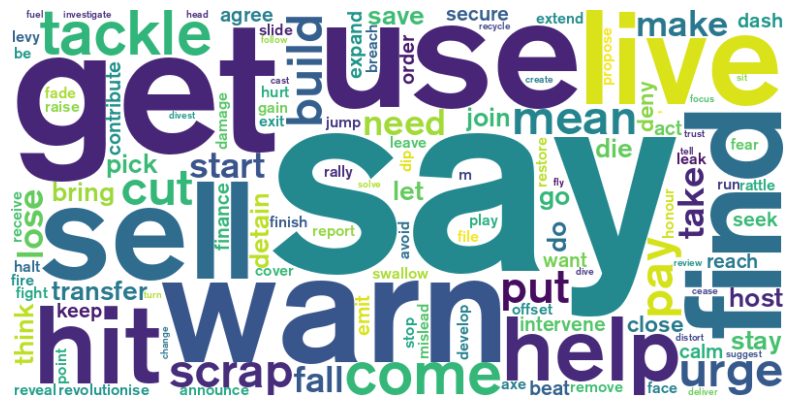

In [42]:
# Convert list of tuples to dictionary
most_common_verbs_dict = dict(verb_counts)

# Create word cloud
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(most_common_verbs_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
len(news_df_sample)

99

In [44]:
vad = pd.read_excel('vad.xlsx', index_col = 0)  #VAD norms
sm = pd.read_excel('sensorimotor.xlsx', index_col = 0) #Sensorimotor norms
sm = sm[['auditory', 'gustatory', 'haptic', 'interoceptive', 'olfactory',
       'visual', 'foot_leg', 'hand_arm', 'head', 'mouth', 'torso']]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sm)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=sm.columns)
scaled_df.index = sm.index

all_norms_n = vad.merge(scaled_df, left_index=True, right_index=True) #This creates a dataframe with all 
                                                                    #our word norm data scaled between 0 and 1

In [45]:
def word_norms_n(news_df_sample):
    tokens = word_tokenize(news_df_sample)
    lemmas = [lemmatizer.lemmatize(i.lower()) for i in tokens if i.isalnum()] 
    
    words_n = []
    norms_n = []
    
    for i in lemmas:
        if i in all_norms.index:
            norms_n.append(all_normsNn.loc[i])
            words_n.append(i)
    
    norms_df_news = pd.DataFrame(norms_n, index=words_n)
    return norms_df_news

# Function to get the mean of word norms for a text
def word_norms_mean_n(news_df_sample):
    tokens = word_tokenize(news_df_sample)
    lemmas = [lemmatizer.lemmatize(i.lower()) for i in tokens if i.isalnum()] 
    
    words_n = []
    norms_n = []
    
    for i in lemmas:
        if i in all_norms.index:
            norms_n.append(all_norms_n.loc[i])
            words_n.append(i)
    
    norms_df_news = pd.DataFrame(norms_n)
    return norms_df_news.mean()

In [46]:
norms_news = []
for i in range(len(news_df_sample)):
    text = news_df_sample.iloc[i]['Headlines']
    norm_n = word_norms_mean_n(text)
    norms_news.append(norm_n)

norms_df_news = pd.DataFrame(norms_news)
norms_df_news['Headlines'] = news_df_sample['Headlines'].values

In [47]:
norms_df_news

valence   arousal  dominance  auditory  gustatory    haptic  \
0   0.412773  0.559123   0.400561  0.379927   0.080336  0.219913   
1   0.643341  0.522813   0.611893  0.312752   0.135546  0.270099   
2   0.641439  0.536799   0.572816  0.278405   0.195432  0.287330   
3   0.505841  0.461969   0.488908  0.284382   0.051768  0.156182   
4   0.504673  0.481132   0.485133  0.502268   0.047105  0.167809   
..       ...       ...        ...       ...        ...       ...   
94  0.621472  0.476503   0.571400  0.255497   0.044763  0.185005   
95  0.490654  0.534198   0.458738  0.312807   0.040526  0.415449   
96  0.677132  0.369533   0.795813  0.330018   0.153568  0.327613   
97  0.469276  0.574657   0.436893  0.346654   0.069033  0.217132   
98  0.388125  0.587050   0.425662  0.411404   0.030702  0.089769   

    interoceptive  olfactory    visual  foot_leg  hand_arm      head  \
0        0.303182   0.138552  0.674923  0.189026  0.335328  0.466239   
1        0.218549   0.160799  0.542850  0.220147  0.318225  0.499474   
2        0.187059   0.231490  0.622049  0.212266  0.436874  0.514539   
3        0.143635   0.150317  0.621504  0.151230  0.235836  0.402776   
4        0.078110   0.105132  0.724458  0.152931  0.251040  0.458123   
..            ...        ...       ...       ...       ...       ...   
94       0.168398   0.079178  0.620837  0.262617  0.332647  0.485863   
95       0.201143   0.063056  0.715541  0.351927  0.527025  0.438538   
96       0.317680   0.150587  0.706220  0.222195  0.299411  0.616951   
97       0.375123   0.061163  0.516745  0.168497  0.345642  0.467189   
98       0.168994   0.020877  0.458596  0.192117  0.342686  0.510000   

       mouth     torso                                          Headlines  
0   0.246113  0.182583  Panic hits global markets amid threat of coron...  
1   0.210281  0.169385  Factcheck  Would 'getting Brexit done' bring l...  
2   0.313342  0.231727  Food waste: how to get cheap grub and help sav...  
3   0.168293  0.110666  UK petrol prices to stay steady despite global...  
4   0.232376  0.121925  China transferred detained Uighurs to factorie...  
..       ...       ...                                                ...  
94  0.192393  0.210307  UK supermarkets stock first homegrown asparagu...  
95  0.231842  0.297115  FirstGroup could cease trading as coronavirus ...  
96  0.268022  0.236200  William Keegan's in my view  \n\n\n  The reali...  
97  0.232473  0.175331  Ghosn's arrest casts doubt on fate of three-ca...  
98  0.529259  0.206827  No-deal Brexit is 'commercial suicide', manufa...  

[99 rows x 15 columns]

In [48]:
print(f"Number of rows in norms_df_news: {norms_df_news.shape[0]}") 

Number of rows in norms_df_news: 99


In [49]:
top_5_valence_texts_news = norms_df_news.nlargest(5, 'valence')['Headlines'].tolist()
top_5_arousal_texts_news = norms_df_news.nlargest(5, 'arousal')['Headlines'].tolist()
top_5_dominance_texts_news = norms_df_news.nlargest(5, 'dominance')['Headlines'].tolist()

print("Top 5 Valence Texts:")
for text in top_5_valence_texts_news:
    print(text)

print("\nTop 5 Arousal Texts:")
for text in top_5_arousal_texts_news:
    print(text)

print("\nTop 5 Dominance Texts:")
for text in top_5_dominance_texts_news:
    print(text)

Top 5 Valence Texts:
From Macs to iPods and apps: how Apple revolutionised technology
Dr Martens' profits up 70% with success of new 'vegan' range
Amazon offsetting pay rise by removing bonuses, union says
Solar power: how investing can help to change lives
Javid seeks to calm business over EU rulebook after Brexit

Top 5 Arousal Texts:
Catastrophic failure of Ukraine jet in Iran suggests missile strike
Off the chart: Australians were world leaders in panic buying, beating UK and Italy
Monsanto must pay couple $2bn in largest verdict yet over cancer claims
Australian Politics Live  Is Australia really heading towards a recession? – Australian politics live podcast
Bank of England to finance UK government Covid-19 crisis spending

Top 5 Dominance Texts:
William Keegan's in my view  


  The reality of no-deal Brexit can no longer be distorted
Netflix picks up BBC's Bodyguard – and ITV cashes in
Amazon offsetting pay rise by removing bonuses, union says
Legal & General agrees tie-up to b

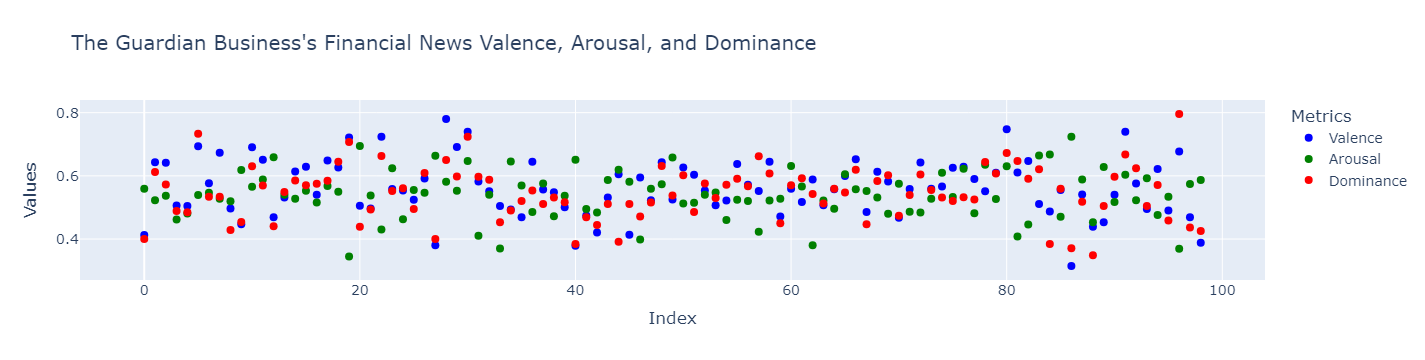

In [50]:
fig = go.Figure()

# Add scatter plots for each column
fig.add_trace(go.Scatter(x=norms_df_news.index, y=norms_df_news['valence'], mode='markers', name='Valence', 
                         marker=dict(color='blue', size=8, symbol='circle')))
fig.add_trace(go.Scatter(x=norms_df_news.index, y=norms_df_news['arousal'], mode='markers', name='Arousal', 
                         marker=dict(color='green', size=8, symbol='circle')))
fig.add_trace(go.Scatter(x=norms_df_news.index, y=norms_df_news['dominance'], mode='markers', name='Dominance', 
                         marker=dict(color='red', size=8, symbol='circle')))

# Update layout with titles and legend
fig.update_layout(
    title= "The Guardian Business's Financial News Valence, Arousal, and Dominance",
    xaxis_title='Index',
    yaxis_title='Values',
    legend_title='Metrics',
    template='plotly',  # Use a dark theme for better aesthetics
    font=dict(size=14)       # Increase font size for better readability
)

# Show the figure
fig.show()

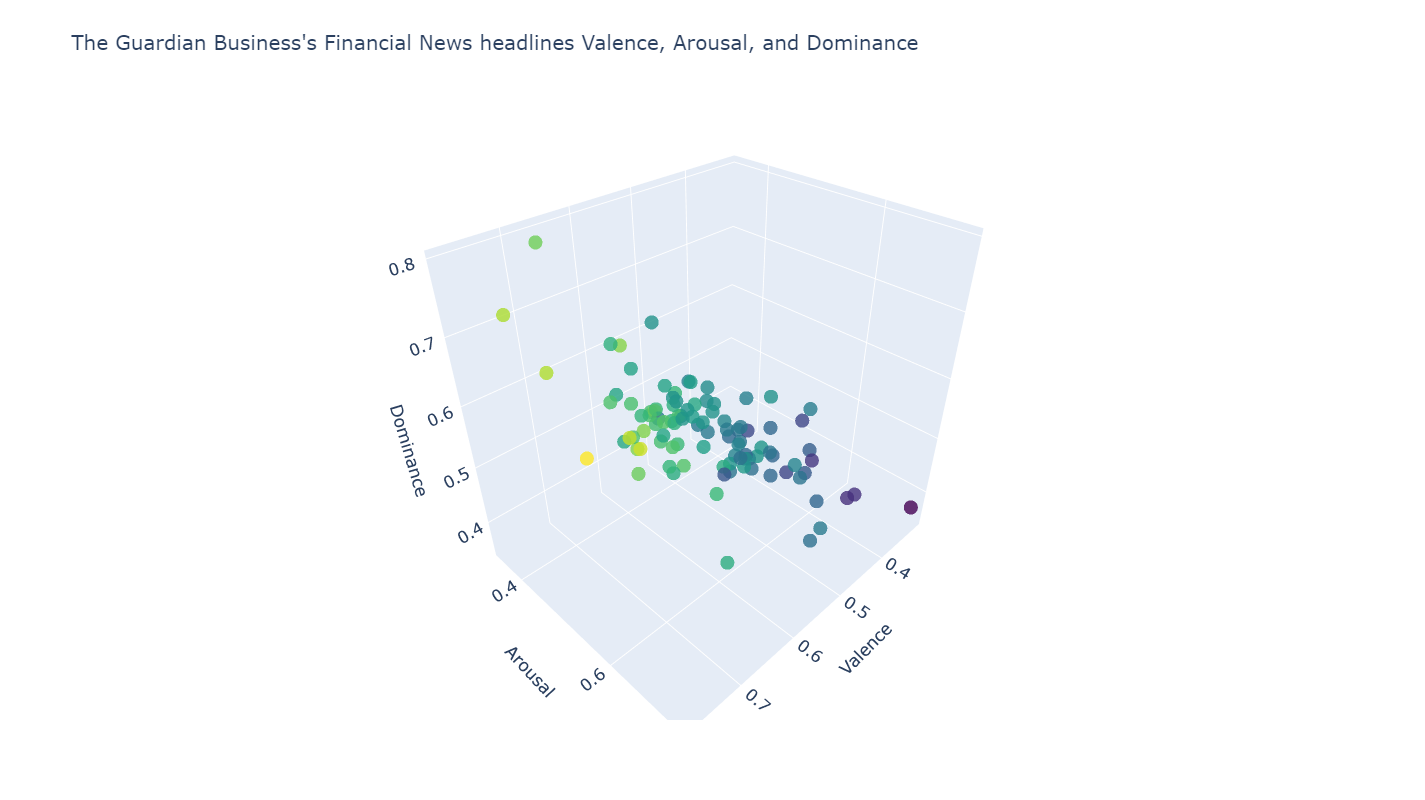

In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=norms_df_news['valence'],
    y=norms_df_news['arousal'],
    z=norms_df_news['dominance'],
    mode='markers',
    marker=dict(
        size=8,
        color=norms_df_news['valence'],  # Color by valence for gradient effect
        colorscale='Viridis',
        opacity=0.8,
    ),
    text=norms_df_news.index,  # Use index for hover text
    hovertemplate='<b>Index</b>: %{text}<br>' +
                  '<b>Valence</b>: %{x}<br>' +
                  '<b>Arousal</b>: %{y}<br>' +
                  '<b>Dominance</b>: %{z}<br>',
    showlegend=False  # Remove legend
))

# Update layout with titles and axis labels
fig.update_layout(
    title="The Guardian Business's Financial News headlines Valence, Arousal, and Dominance",
    scene=dict(
        xaxis_title='Valence',
        yaxis_title='Arousal',
        zaxis_title='Dominance',
    ),
    template='plotly',  # Dark theme for aesthetics
    font=dict(size=14),  # Increase font size
    width=1000,  # Set width of the figure
    height=800,  # Set height of the figure
)

# Show the figure
fig.show()

In [52]:
top_5_visual_texts = norms_df_news.nlargest(5, 'visual')[['Headlines', 'visual']]
top_5_haptic_texts = norms_df_news.nlargest(5, 'haptic')[['Headlines', 'haptic']]
top_5_auditory_texts = norms_df_news.nlargest(5, 'auditory')[['Headlines', 'auditory']]
top_5_gustatory_texts = norms_df_news.nlargest(5, 'gustatory')[['Headlines', 'gustatory']]
top_5_interoceptive_texts = norms_df_news.nlargest(5, 'interoceptive')[['Headlines', 'interoceptive']]


print("Top 5 Visual Texts Guardian News:")
for index, row in top_5_visual_texts.iterrows():
    print(f"Text: {row['Headlines']}, Visual: {row['visual']}")

print("\nTop 5 Haptic Texts Guardian News:")
for index, row in top_5_haptic_texts.iterrows():
    print(f"Text: {row['Headlines']}, Haptic: {row['haptic']}")

print("\nTop 5 Auditory Texts Guardian News:")
for index, row in top_5_auditory_texts.iterrows():
    print(f"Text: {row['Headlines']}, Auditory: {row['auditory']}")

print("\nTop 5 Gustatory Texts Guardian News:")
for index, row in top_5_gustatory_texts.iterrows():
    print(f"Text: {row['Headlines']}, Gustatory: {row['gustatory']}")

print("\nTop 5 Interoceptive Texts Guardian News:")
for index, row in top_5_interoceptive_texts.iterrows():
    print(f"Text: {row['Headlines']}, Interoceptive: {row['interoceptive']}")

Top 5 Visual Texts Guardian News:
Text: Google and Facebook under scrutiny over UK ad market dominance, Visual: 0.8603174603000001
Text: The long read  No room at the top: why are US boardrooms still so white?, Visual: 0.83964705884
Text: From Macs to iPods and apps: how Apple revolutionised technology, Visual: 0.837134503
Text: Dry eyes and an absent A-list as the new zeitgeist jettisons Philip Green, Visual: 0.7806215425999999
Text: Uncle Ben's rice firm to scrap brand image of black farmer, Visual: 0.7772389529714286

Top 5 Haptic Texts Guardian News:
Text: From Macs to iPods and apps: how Apple revolutionised technology, Haptic: 0.6188645772354036
Text: America's corn belt farmers face uncertainty after rain … and more rain, Haptic: 0.5393849793711164
Text: Netflix picks up BBC's Bodyguard – and ITV cashes in, Haptic: 0.533707865238985
Text: Brexit means eggs sit: Ferrero warns of stale Easter chocolate, Haptic: 0.43107650366796185
Text: FirstGroup could cease trading as coronaviru

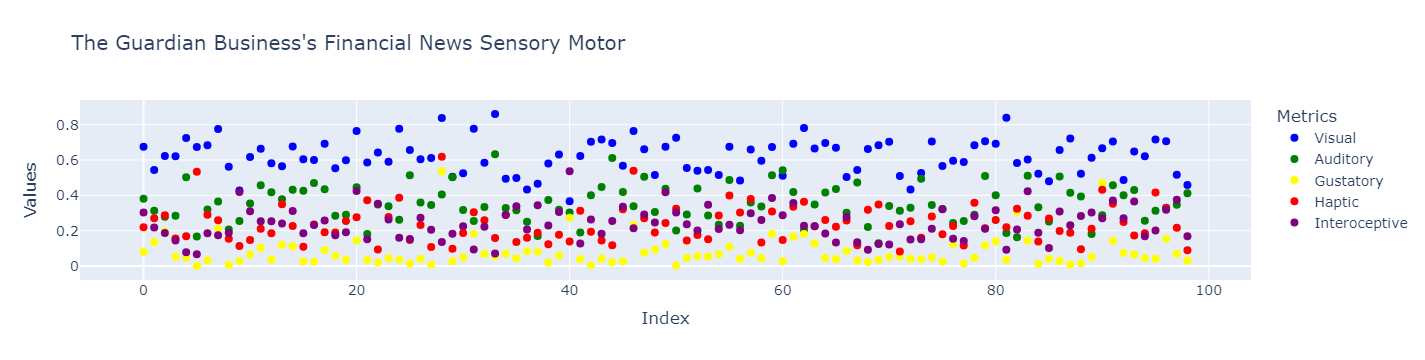

In [53]:
fig = go.Figure()

# Add scatter plots for each column
fig.add_trace(go.Scatter(x=norms_df_news.index, y=norms_df_news['visual'], mode='markers', name='Visual', 
                         marker=dict(color='blue', size=8, symbol='circle')))
fig.add_trace(go.Scatter(x=norms_df_news.index, y=norms_df_news['auditory'], mode='markers', name='Auditory', 
                         marker=dict(color='green', size=8, symbol='circle')))
fig.add_trace(go.Scatter(x=norms_df_news.index, y=norms_df_news['gustatory'], mode='markers', name='Gustatory', 
                         marker=dict(color='yellow', size=8, symbol='circle')))
fig.add_trace(go.Scatter(x=norms_df_news.index, y=norms_df_news['haptic'], mode='markers', name='Haptic', 
                         marker=dict(color='red', size=8, symbol='circle')))
fig.add_trace(go.Scatter(x=norms_df_news.index, y=norms_df_news['interoceptive'], mode='markers', name='Interoceptive', 
                         marker=dict(color='purple', size=8, symbol='circle')))

# Update layout with titles and legend
fig.update_layout(
    title="The Guardian Business's Financial News Sensory Motor",
    xaxis_title='Index',
    yaxis_title='Values',
    legend_title='Metrics',
    template='plotly',  # Use a dark theme for better aesthetics
    font=dict(size=14)       # Increase font size for better readability
)

# Show the figure
fig.show()

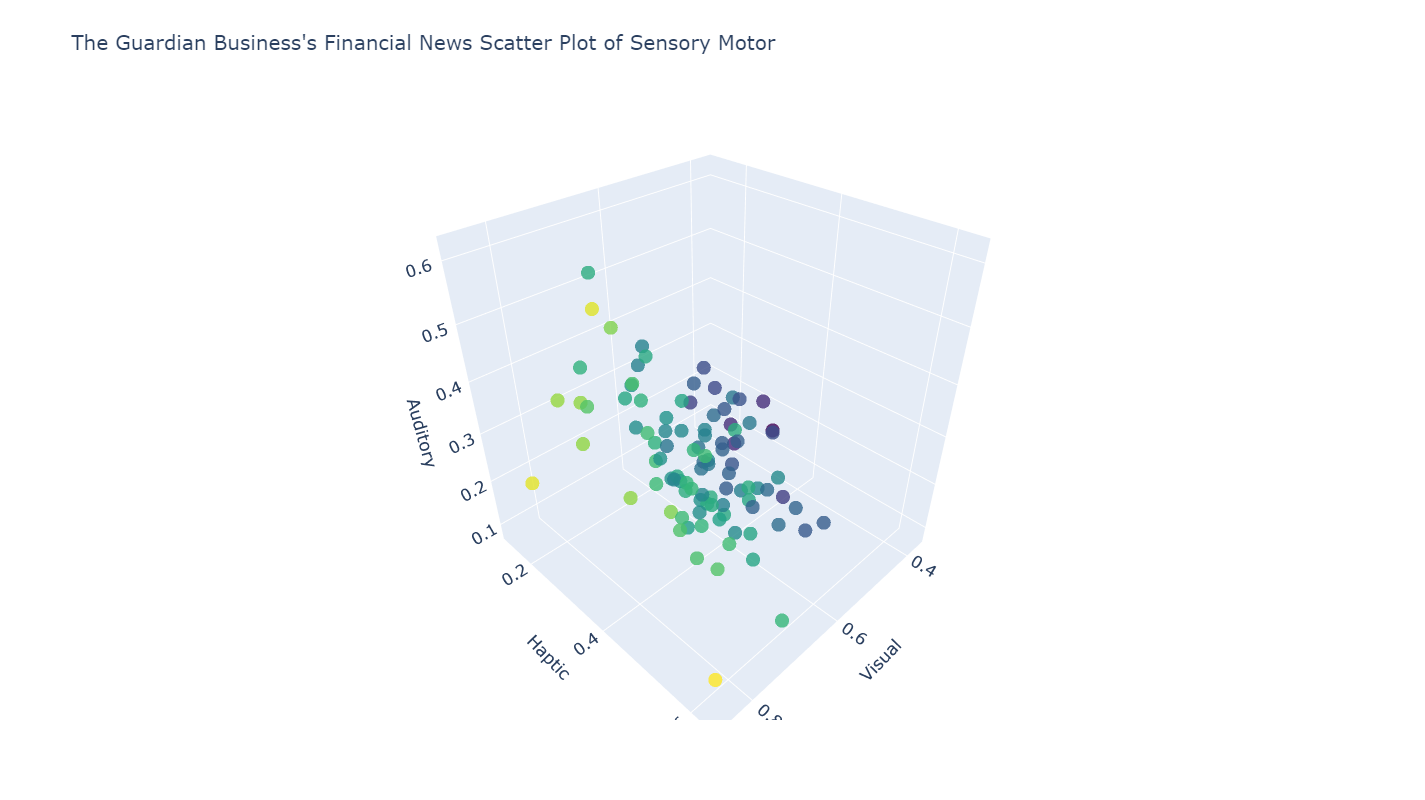

In [54]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=norms_df_news['visual'],
    y=norms_df_news['auditory'],
    z=norms_df_news['haptic'],
    mode='markers',
    marker=dict(
        size=8,
        color=norms_df_news['visual'],  # Color by valence for gradient effect
        colorscale='Viridis',
        opacity=0.8,
    ),
    text=norms_df_news.index,  # Use index for hover text
    hovertemplate='<b>Index</b>: %{text}<br>' +
                  '<b>Visual</b>: %{x}<br>' +
                  '<b>Auditory</b>: %{y}<br>' +
                  '<b>Haptic</b>: %{z}<br>',
    showlegend=False  # Remove legend
))

# Update layout with titles and axis labels
fig.update_layout(
    title="The Guardian Business's Financial News Scatter Plot of Sensory Motor",
    scene=dict(
        xaxis_title='Visual',
        yaxis_title='Haptic',
        zaxis_title='Auditory',
    ),
    template='plotly',  # Dark theme for aesthetics
    font=dict(size=14),  # Increase font size
    width=1000,  # Set width of the figure
    height=800,  # Set height of the figure
)

# Show the figure
fig.show()

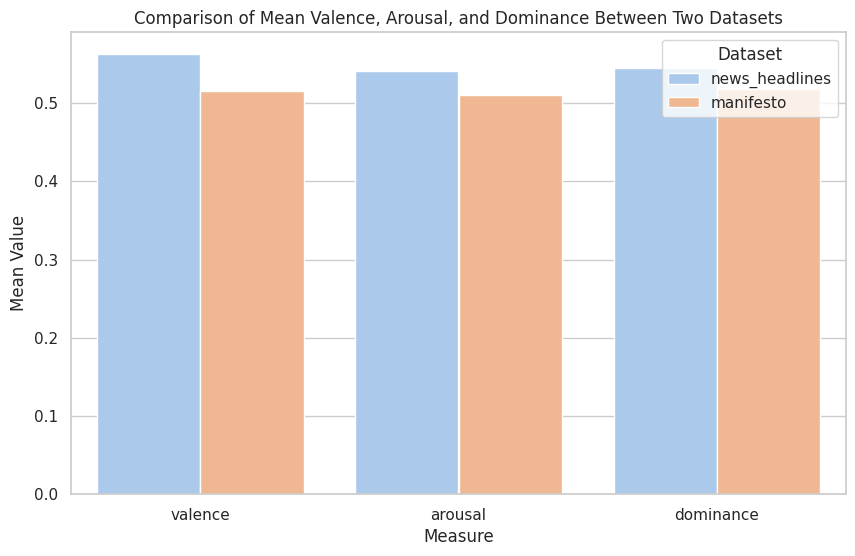

In [55]:
means_news = norms_df_news[['valence', 'arousal', 'dominance']].mean()
means_manifesto = norms_df[['valence', 'arousal', 'dominance']].mean()

# Combine means into a DataFrame
means_df = pd.DataFrame({
    'measure': ['valence', 'arousal', 'dominance'],
    'news_headlines': means_news.values,
    'manifesto': means_manifesto.values
})

# Melt the DataFrame for plotting
melted_means = pd.melt(means_df, id_vars='measure', value_vars=['news_headlines', 'manifesto'], var_name='dataset', value_name='mean_value')

# Plot using seaborn barplot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(data=melted_means, x='measure', y='mean_value', hue='dataset', palette='pastel')

# Add titles and labels
plt.title('Comparison of Mean Valence, Arousal, and Dominance Between Two Datasets')
plt.xlabel('Measure')
plt.ylabel('Mean Value')
plt.legend(title='Dataset')

# Show plot
plt.show()

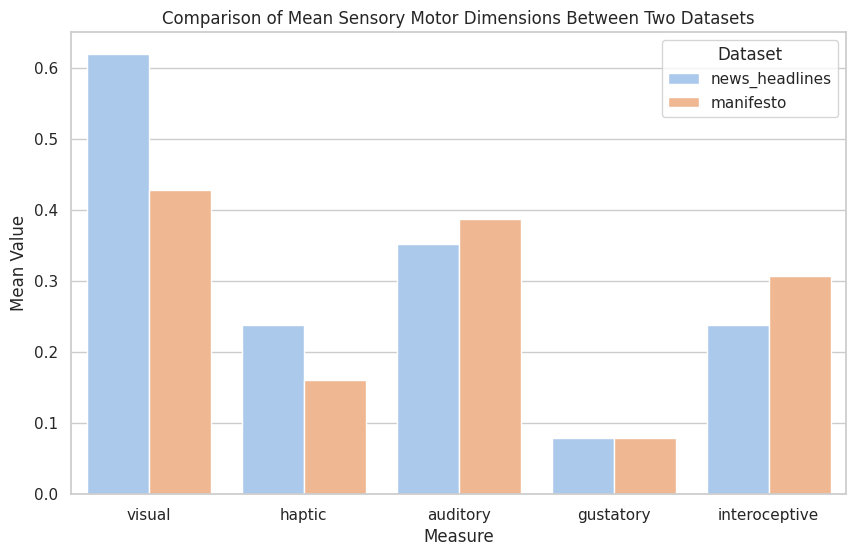

In [56]:
means_news = norms_df_news[['visual', 'haptic', 'auditory', "gustatory", "interoceptive"]].mean()
means_manifesto = norms_df[['visual', 'haptic', 'auditory', "gustatory", "interoceptive"]].mean()

# Combine means into a DataFrame
means_df = pd.DataFrame({
    'measure': ['visual', 'haptic', 'auditory', "gustatory", "interoceptive"],
    'news_headlines': means_news.values,
    'manifesto': means_manifesto.values
})

# Melt the DataFrame for plotting
melted_means = pd.melt(means_df, id_vars='measure', value_vars=['news_headlines', 'manifesto'], var_name='dataset', value_name='mean_value')

# Plot using seaborn barplot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(data=melted_means, x='measure', y='mean_value', hue='dataset', palette='pastel')

# Add titles and labels
plt.title('Comparison of Mean Sensory Motor Dimensions Between Two Datasets')
plt.xlabel('Measure')
plt.ylabel('Mean Value')
plt.legend(title='Dataset')

# Show plot
plt.show()

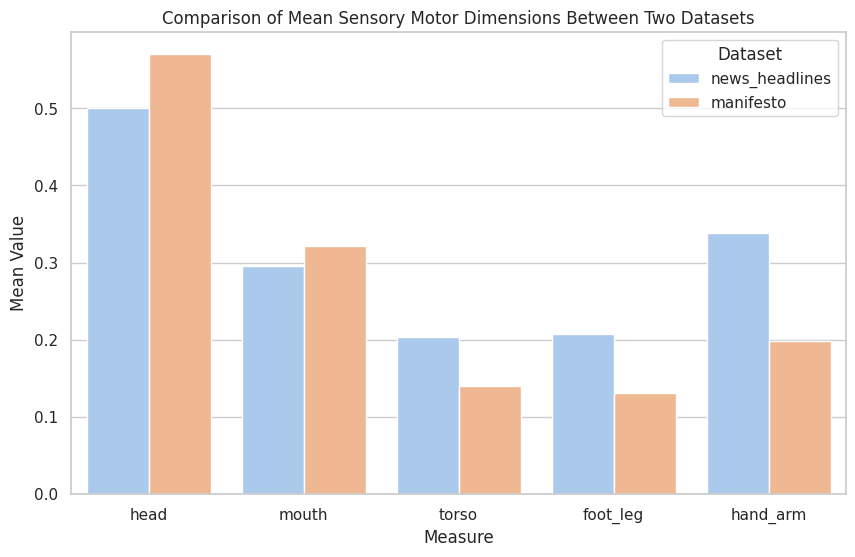

In [57]:
means_news = norms_df_news[['head', 'mouth', 'torso', "foot_leg", "hand_arm"]].mean()
means_manifesto = norms_df[['head', 'mouth', 'torso', "foot_leg", "hand_arm"]].mean()

# Combine means into a DataFrame
means_df = pd.DataFrame({
    'measure': ['head', 'mouth', 'torso', "foot_leg", "hand_arm"],
    'news_headlines': means_news.values,
    'manifesto': means_manifesto.values
})

# Melt the DataFrame for plotting
melted_means = pd.melt(means_df, id_vars='measure', value_vars=['news_headlines', 'manifesto'], var_name='dataset', value_name='mean_value')

# Plot using seaborn barplot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(data=melted_means, x='measure', y='mean_value', hue='dataset', palette='pastel')

# Add titles and labels
plt.title('Comparison of Mean Sensory Motor Dimensions Between Two Datasets')
plt.xlabel('Measure')
plt.ylabel('Mean Value')
plt.legend(title='Dataset')

# Show plot
plt.show()

In [58]:
norms_df_news["source"]="Guardian"
norms_df["source"]="Manifesto"

In [59]:
all_df = pd.concat([norms_df_news, norms_df]).reset_index(drop=True)

In [60]:
all_df

valence   arousal  dominance  auditory  gustatory    haptic  \
0    0.412773  0.559123   0.400561  0.379927   0.080336  0.219913   
1    0.643341  0.522813   0.611893  0.312752   0.135546  0.270099   
2    0.641439  0.536799   0.572816  0.278405   0.195432  0.287330   
3    0.505841  0.461969   0.488908  0.284382   0.051768  0.156182   
4    0.504673  0.481132   0.485133  0.502268   0.047105  0.167809   
..        ...       ...        ...       ...        ...       ...   
193  0.636488  0.511042   0.651193  0.349712   0.073326  0.102307   
194  0.590732  0.536378   0.595967  0.442931   0.192982  0.209344   
195  0.636994  0.497684   0.671537  0.428719   0.151789  0.193696   
196  0.557535  0.491424   0.598756  0.337436   0.109105  0.304763   
197       NaN       NaN        NaN       NaN        NaN       NaN   

     interoceptive  olfactory    visual  foot_leg  hand_arm      head  \
0         0.303182   0.138552  0.674923  0.189026  0.335328  0.466239   
1         0.218549   0.160799  0.542850  0.220147  0.318225  0.499474   
2         0.187059   0.231490  0.622049  0.212266  0.436874  0.514539   
3         0.143635   0.150317  0.621504  0.151230  0.235836  0.402776   
4         0.078110   0.105132  0.724458  0.152931  0.251040  0.458123   
..             ...        ...       ...       ...       ...       ...   
193       0.268197   0.068261  0.477671  0.108525  0.146283  0.563823   
194       0.370043   0.182456  0.539112  0.098439  0.193160  0.599825   
195       0.369074   0.141974  0.537693  0.231744  0.285368  0.502117   
196       0.200953   0.116768  0.584924  0.115317  0.346890  0.448480   
197            NaN        NaN       NaN       NaN       NaN       NaN   

        mouth     torso                                          Headlines  \
0    0.246113  0.182583  Panic hits global markets amid threat of coron...   
1    0.210281  0.169385  Factcheck  Would 'getting Brexit done' bring l...   
2    0.313342  0.231727  Food waste: how to get cheap grub and help sav...   
3    0.168293  0.110666  UK petrol prices to stay steady despite global...   
4    0.232376  0.121925  China transferred detained Uighurs to factorie...   
..        ...       ...                                                ...   
193  0.361917  0.132599                                                NaN   
194  0.258596  0.123843                                                NaN   
195  0.327380  0.201535                                                NaN   
196  0.224781  0.126617                                                NaN   
197       NaN       NaN                                                NaN   

        source                                               text  
0     Guardian                                                NaN  
1     Guardian                                                NaN  
2     Guardian                                                NaN  
3     Guardian                                                NaN  
4     Guardian                                                NaN  
..         ...                                                ...  
193  Manifesto  Speculation is the state or fact of being of g...  
194  Manifesto  Speculation is the quality of being worthy of ...  
195  Manifesto  Speculation is having or showing the qualities...  
196  Manifesto  Speculation is an amount or section which, whe...  
197  Manifesto                                                     

[198 rows x 17 columns]

<Axes: xlabel='source', ylabel='valence'>

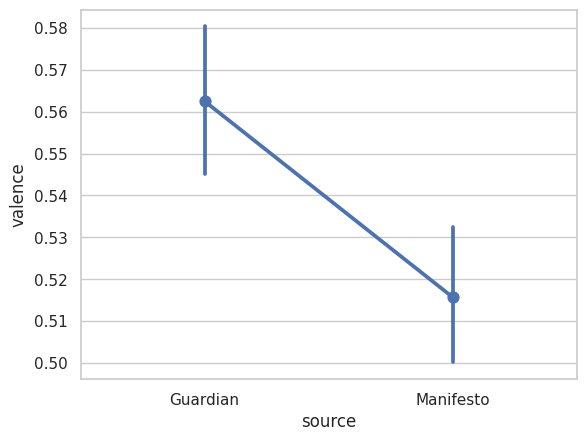

In [61]:
sns.pointplot(x="source", y="valence", data=all_df)

<Axes: xlabel='source', ylabel='arousal'>

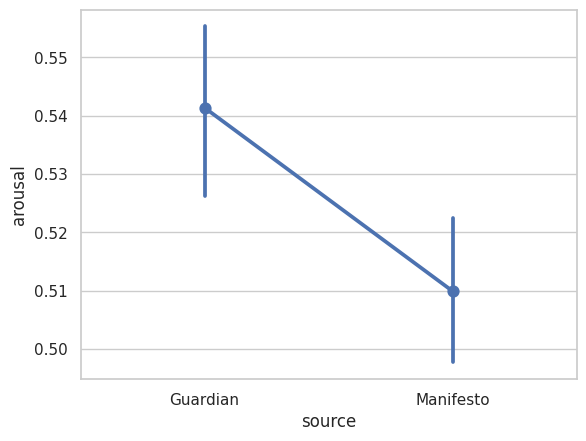

In [62]:
sns.pointplot(x="source", y="arousal", data=all_df)

<Axes: xlabel='source', ylabel='dominance'>

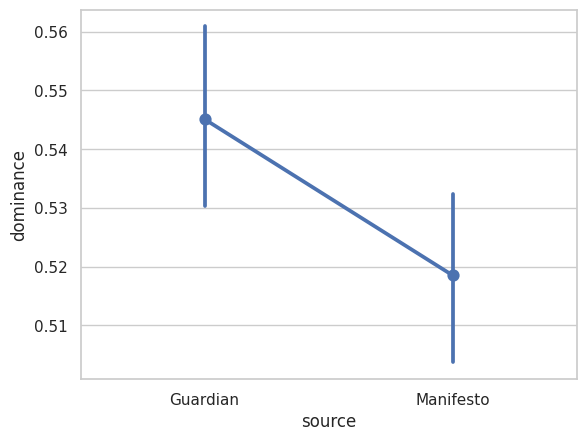

In [63]:
sns.pointplot(x="source", y="dominance", data=all_df)

<Axes: xlabel='source', ylabel='visual'>

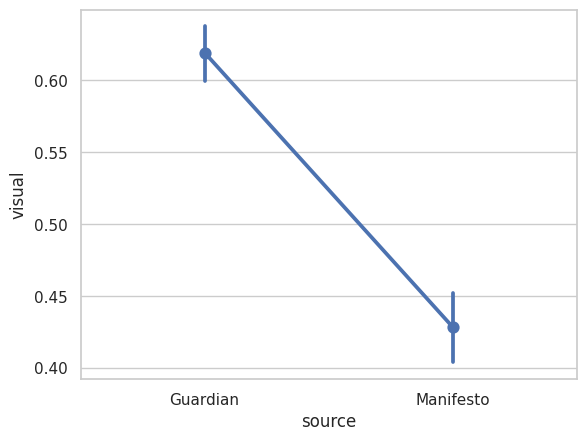

In [64]:
sns.pointplot(x="source", y="visual", data=all_df)

<Axes: xlabel='source', ylabel='auditory'>

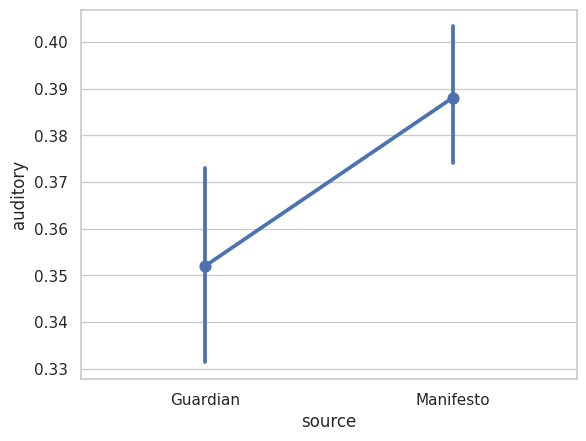

In [65]:
sns.pointplot(x="source", y="auditory", data=all_df)

<Axes: xlabel='source', ylabel='gustatory'>

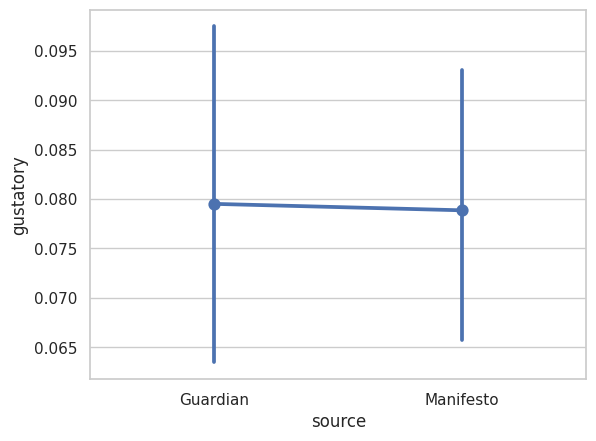

In [66]:
sns.pointplot(x="source", y="gustatory", data=all_df)

<Axes: xlabel='source', ylabel='haptic'>

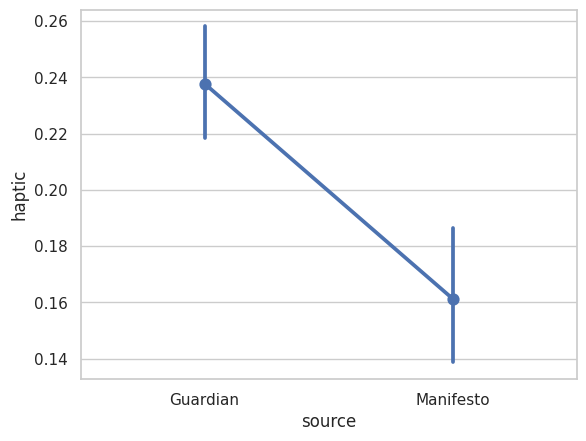

In [67]:
sns.pointplot(x="source", y="haptic", data=all_df)

<Axes: xlabel='source', ylabel='interoceptive'>

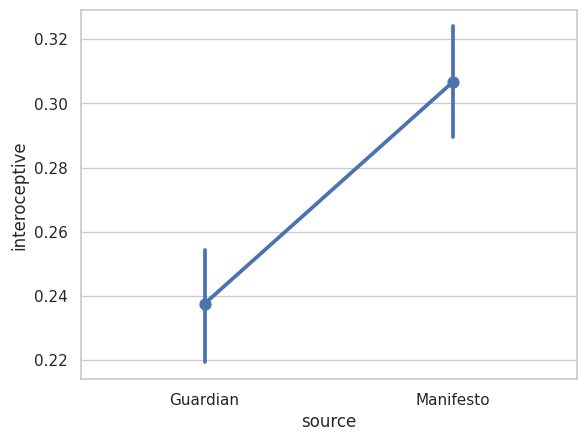

In [68]:
sns.pointplot(x="source", y="interoceptive", data=all_df)

<Axes: xlabel='source', ylabel='head'>

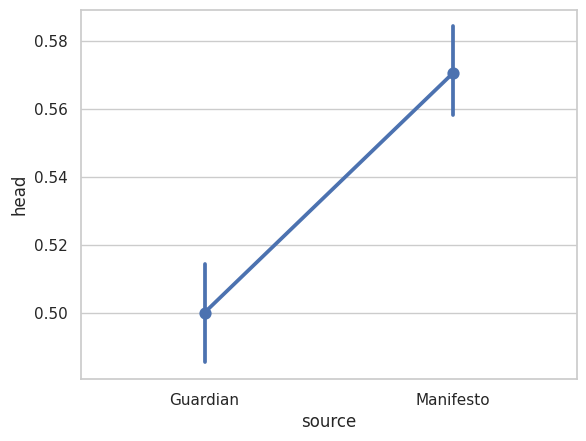

In [69]:
sns.pointplot(x="source", y="head", data=all_df)

<Axes: xlabel='source', ylabel='mouth'>

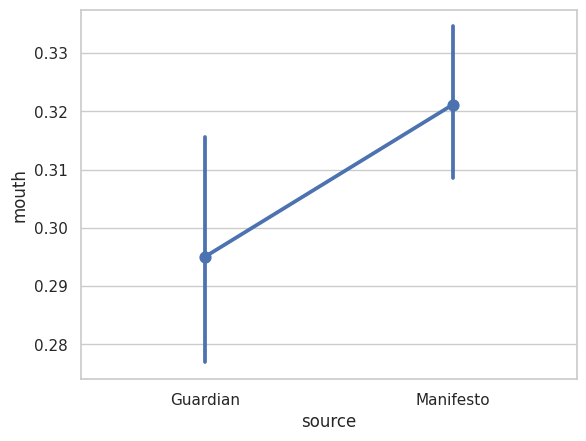

In [70]:
sns.pointplot(x="source", y="mouth", data=all_df)

<Axes: xlabel='source', ylabel='torso'>

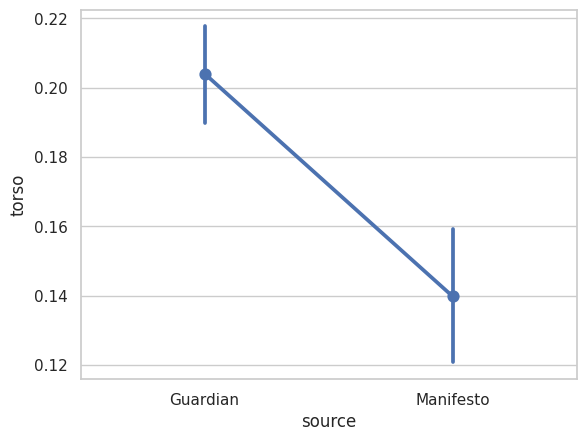

In [71]:
sns.pointplot(x="source", y="torso", data=all_df)

In [72]:
!pip install pingouin

In [75]:
import pingouin as pg

In [76]:
all_df

valence   arousal  dominance  auditory  gustatory    haptic  \
0    0.412773  0.559123   0.400561  0.379927   0.080336  0.219913   
1    0.643341  0.522813   0.611893  0.312752   0.135546  0.270099   
2    0.641439  0.536799   0.572816  0.278405   0.195432  0.287330   
3    0.505841  0.461969   0.488908  0.284382   0.051768  0.156182   
4    0.504673  0.481132   0.485133  0.502268   0.047105  0.167809   
..        ...       ...        ...       ...        ...       ...   
193  0.636488  0.511042   0.651193  0.349712   0.073326  0.102307   
194  0.590732  0.536378   0.595967  0.442931   0.192982  0.209344   
195  0.636994  0.497684   0.671537  0.428719   0.151789  0.193696   
196  0.557535  0.491424   0.598756  0.337436   0.109105  0.304763   
197       NaN       NaN        NaN       NaN        NaN       NaN   

     interoceptive  olfactory    visual  foot_leg  hand_arm      head  \
0         0.303182   0.138552  0.674923  0.189026  0.335328  0.466239   
1         0.218549   0.160799  0.542850  0.220147  0.318225  0.499474   
2         0.187059   0.231490  0.622049  0.212266  0.436874  0.514539   
3         0.143635   0.150317  0.621504  0.151230  0.235836  0.402776   
4         0.078110   0.105132  0.724458  0.152931  0.251040  0.458123   
..             ...        ...       ...       ...       ...       ...   
193       0.268197   0.068261  0.477671  0.108525  0.146283  0.563823   
194       0.370043   0.182456  0.539112  0.098439  0.193160  0.599825   
195       0.369074   0.141974  0.537693  0.231744  0.285368  0.502117   
196       0.200953   0.116768  0.584924  0.115317  0.346890  0.448480   
197            NaN        NaN       NaN       NaN       NaN       NaN   

        mouth     torso                                          Headlines  \
0    0.246113  0.182583  Panic hits global markets amid threat of coron...   
1    0.210281  0.169385  Factcheck  Would 'getting Brexit done' bring l...   
2    0.313342  0.231727  Food waste: how to get cheap grub and help sav...   
3    0.168293  0.110666  UK petrol prices to stay steady despite global...   
4    0.232376  0.121925  China transferred detained Uighurs to factorie...   
..        ...       ...                                                ...   
193  0.361917  0.132599                                                NaN   
194  0.258596  0.123843                                                NaN   
195  0.327380  0.201535                                                NaN   
196  0.224781  0.126617                                                NaN   
197       NaN       NaN                                                NaN   

        source                                               text  
0     Guardian                                                NaN  
1     Guardian                                                NaN  
2     Guardian                                                NaN  
3     Guardian                                                NaN  
4     Guardian                                                NaN  
..         ...                                                ...  
193  Manifesto  Speculation is the state or fact of being of g...  
194  Manifesto  Speculation is the quality of being worthy of ...  
195  Manifesto  Speculation is having or showing the qualities...  
196  Manifesto  Speculation is an amount or section which, whe...  
197  Manifesto                                                     

[198 rows x 17 columns]

In [77]:
t_test_i=pg.pairwise_tests(dv="interoceptive", between='source', data=all_df)
t_test_i

Contrast         A          B  Paired  Parametric         T         dof  \
0   source  Guardian  Manifesto   False        True -5.404999  194.998961   

  alternative         p-unc       BF10    hedges  
0   two-sided  1.879367e-07  6.562e+04 -0.767193

In [78]:
t_test_gustatory=pg.pairwise_tests(dv='gustatory', between='source', data=all_df)

In [79]:
t_test_gustatory

Contrast         A          B  Paired  Parametric         T         dof  \
0   source  Guardian  Manifesto   False        True  0.058393  189.208122   

  alternative     p-unc   BF10    hedges  
0   two-sided  0.953497  0.155  0.008281

In [80]:
len(all_df)

198

In [81]:
grouped_stats = all_df.groupby('source')['interoceptive'].agg(['mean', 'std']).reset_index()
print(grouped_stats)

      source      mean       std
0   Guardian  0.237571  0.089950
1  Manifesto  0.306577  0.089243


In [82]:
import numpy as np

In [83]:
mean_g = 0.237571
mean_m = 0.306577
std_g = 0.089950
std_m = 0.089243
n1, n2 = 99, 99
pooled_std = np.sqrt(((n1 - 1) * std_g**2 + (n2 - 1) * std_m**2) / (n1 + n2 - 2))
pooled_std

0.08959719735851115

In [84]:
cohen_d = (mean_m - mean_g) / pooled_std
print(f"Cohen's d: {cohen_d}")

Cohen's d: 0.7701803408412625


In [85]:
valence_stats = all_df.groupby('source')['valence'].agg(['mean', 'std']).reset_index()
print(valence_stats)

      source      mean       std
0   Guardian  0.562485  0.089127
1  Manifesto  0.515714  0.079747


In [86]:
arousal_stats = all_df.groupby('source')['arousal'].agg(['mean', 'std']).reset_index()
print(arousal_stats)

      source      mean       std
0   Guardian  0.541362  0.074753
1  Manifesto  0.509931  0.064573


In [87]:
dom_stats = all_df.groupby('source')['dominance'].agg(['mean', 'std']).reset_index()
print(dom_stats)

      source      mean       std
0   Guardian  0.545094  0.084018
1  Manifesto  0.518522  0.075984


In [88]:
vis_stats = all_df.groupby('source')['visual'].agg(['mean', 'std']).reset_index()
print(vis_stats)

      source      mean       std
0   Guardian  0.619301  0.098324
1  Manifesto  0.428607  0.124201
